In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
df =pd.read_csv('loan_approval_dataset.csv')


<font size='6'>Understand Data Structure </font>

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [10]:
df.duplicated().sum()

0

In [12]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [14]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

<font size='6'>Standardize Data Formats</font>

In [26]:
print(df.columns.tolist())


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [28]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())


['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [30]:
df["loan_status"].value_counts(normalize=True)*100


loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64

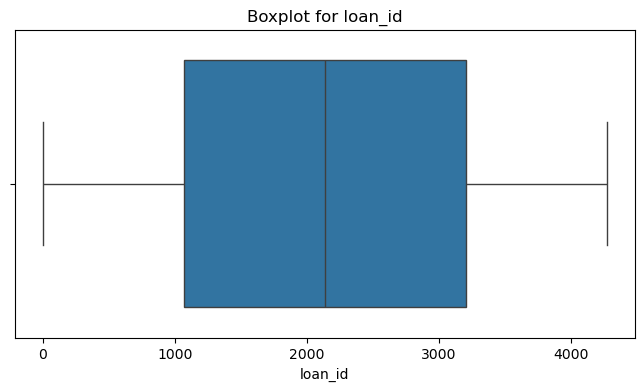

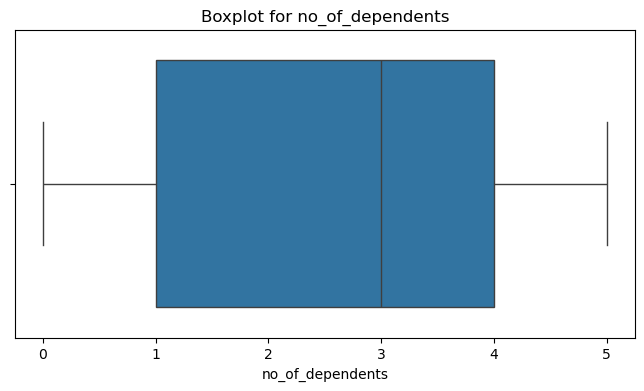

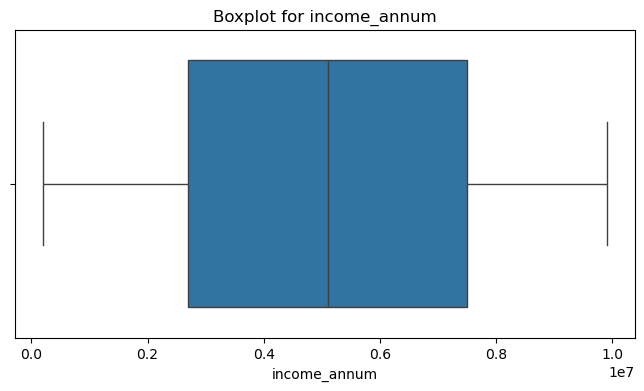

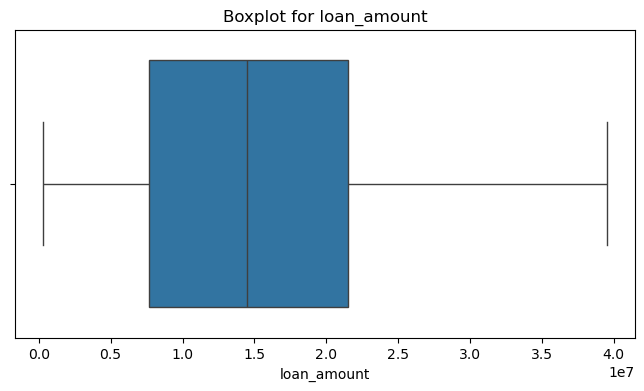

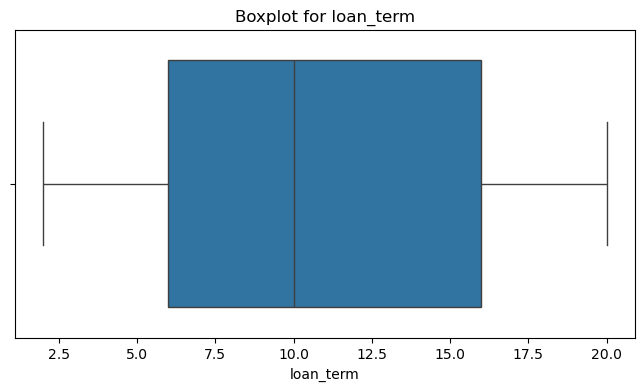

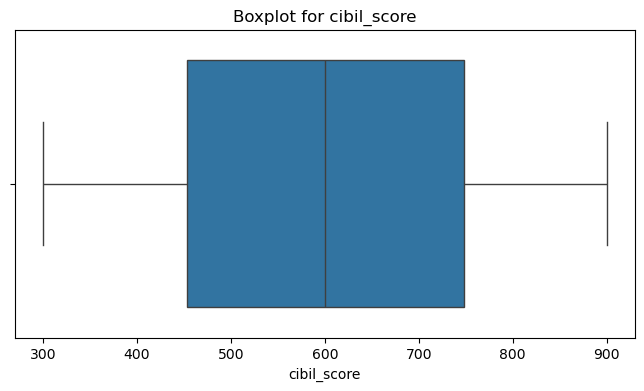

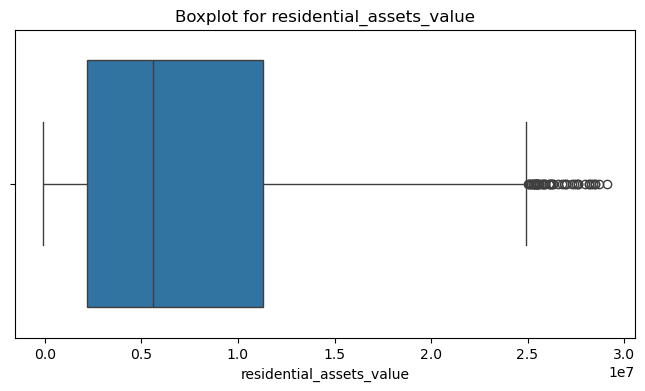

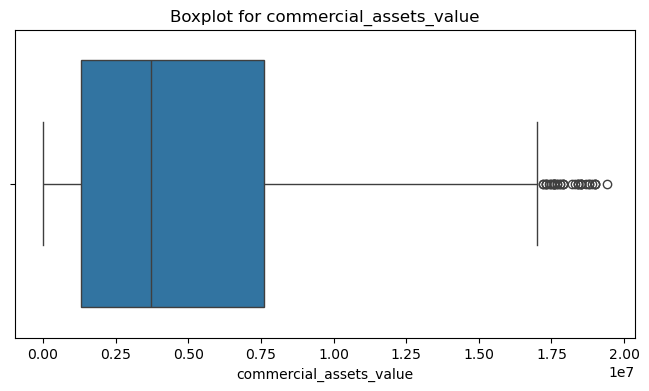

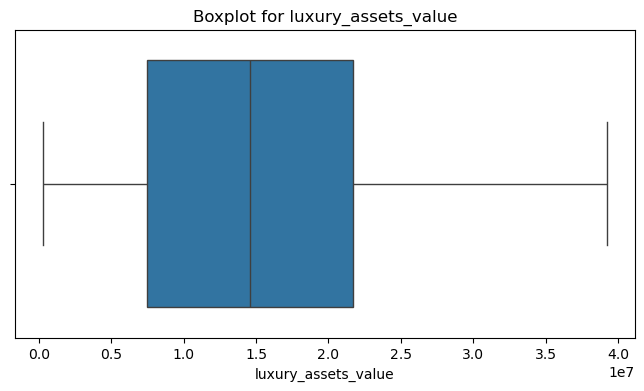

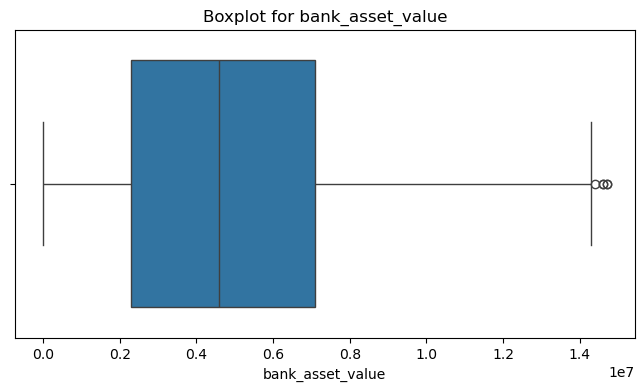

In [32]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

<font size='6'>Explore the Data </font>

In [34]:
min_val = df['loan_amount'].min()
max_val = df['loan_amount'].max()
avg_val = df['loan_amount'].mean()

print(f"Min Loan Amount: {min_val}")
print(f"Max Loan Amount: {max_val}")
print(f"Average Loan Amount: {avg_val:.2f}")


Min Loan Amount: 300000
Max Loan Amount: 39500000
Average Loan Amount: 15133450.46


In [36]:
df.groupby("loan_status")["loan_amount"].agg(['min','mean','max'])


,min,mean,max
loan_status,,,
Approved,300000,1.524725e+07,39500000
Rejected,300000,1.494606e+07,38200000


<font size='6'>Data Transformation</font>

In [38]:
text_cols = df.select_dtypes(include=['object']).columns
encoders = {}  

for col in text_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

In [40]:
joblib.dump(encoders, "encoders.pkl")

['encoders.pkl']

In [42]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [44]:
df.dtypes

loan_id                     int64
no_of_dependents            int64
education                   int32
self_employed               int32
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int32
dtype: object

<font size='6'>EDA</font>

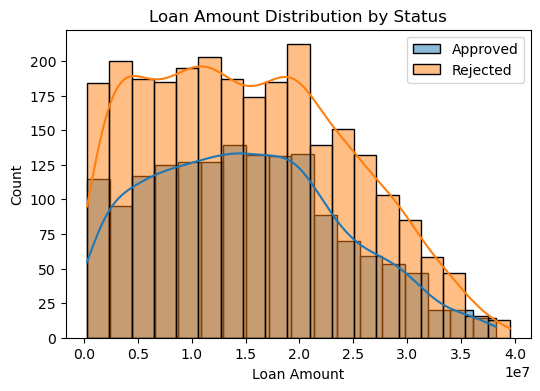

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(df[df["loan_status"]==1]["loan_amount"], label="Approved", kde=True)
sns.histplot(df[df["loan_status"]==0]["loan_amount"], label="Rejected", kde=True)

plt.legend()
plt.title("Loan Amount Distribution by Status")
plt.xlabel("Loan Amount")
plt.show()

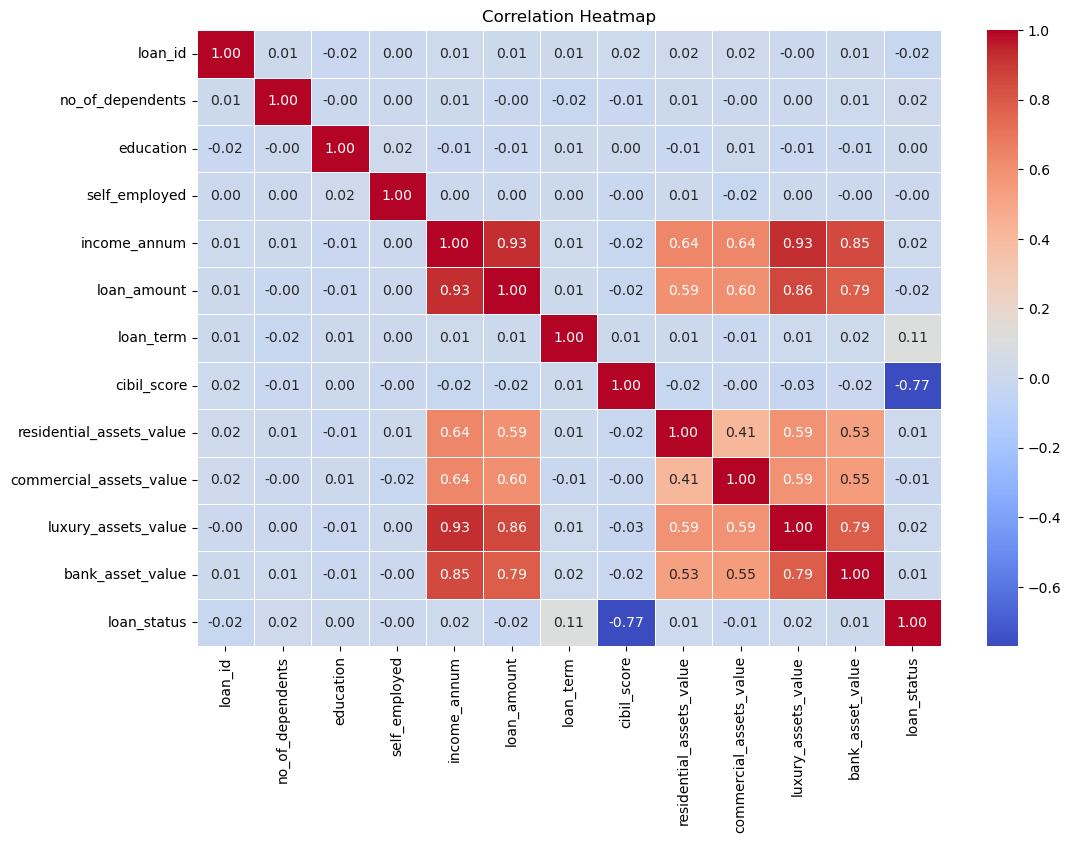

In [49]:
plt.figure(figsize=(12,8))

corr = df.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

<font size='6'>Modeling</font>

In [52]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.2 ,random_state=42)

In [56]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

<font size='4'>Logistic Regression relies on gradient-based optimization, making it sensitive to differences in feature magnitudes.
Therefore, we standardized the features using StandardScaler to ensure all variables contribute equally to the model.
The scaler was fitted on the training set and only transformed on the test set to avoid data leakage.</font>

In [61]:
log_model = LogisticRegression(max_iter=1000)



In [63]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [65]:
y_pred_log = log_model.predict(X_test_scaled)

In [67]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)


Accuracy: 0.9215456674473068


In [69]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log))



Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       531
           1       0.92      0.87      0.89       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854



confusion matrix: [[505  26]
 [ 41 282]]


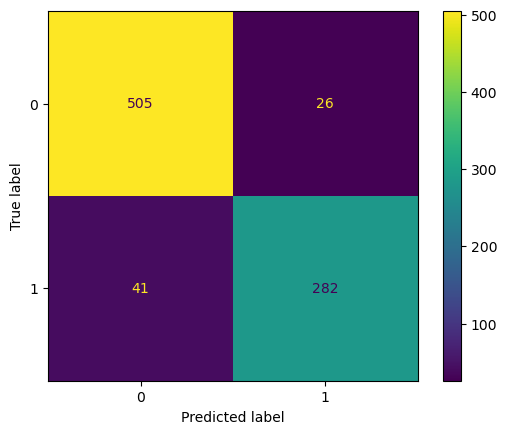

In [71]:
cm=confusion_matrix(y_test,y_pred_log)
print('confusion matrix:',cm)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [73]:
joblib.dump(log_model, "loan_logistic_model.pkl")

['loan_logistic_model.pkl']

In [75]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [77]:
y_pred=tree.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9718969555035128


In [81]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       531
           1       0.94      0.99      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.97      0.97      0.97       854



confusion matrix: [[510  21]
 [  3 320]]


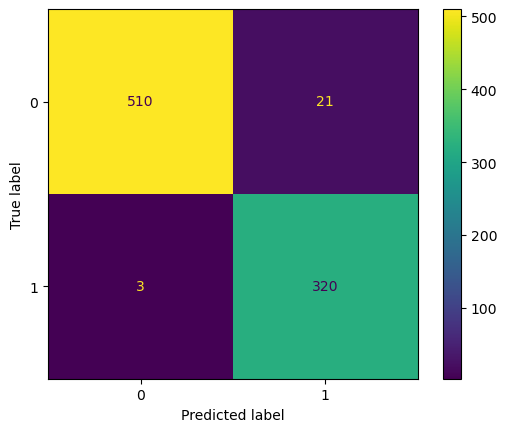

In [83]:
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix:',cm)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [85]:
joblib.dump(tree, "loan_tree_model.pkl")

['loan_tree_model.pkl']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [89]:
log_model_smote = LogisticRegression(max_iter=1000)

In [91]:
log_model_smote.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [93]:
y_pred_smote=log_model_smote.predict(X_test_scaled)

In [95]:
accuracy = accuracy_score(y_test, y_pred_smote)
print("Accuracy:", accuracy)

Accuracy: 0.9285714285714286


In [97]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_smote))


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       531
           1       0.91      0.90      0.91       323

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854



confusion matrix: [[501  30]
 [ 31 292]]


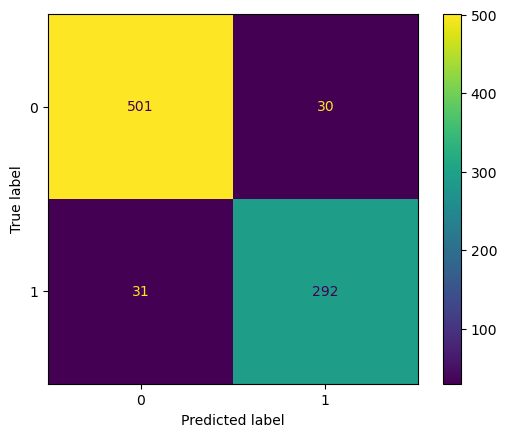

In [99]:
cm=confusion_matrix(y_test,y_pred_smote)
print('confusion matrix:',cm)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [101]:
joblib.dump(log_model_smote, "loan_logistic_smote_model.pkl")

['loan_logistic_smote_model.pkl']

<font size='5'>Although overall accuracy slightly decreased after applying SMOTE, recall and F1-score improved significantly, indicating better minority class detection.</font>

In [104]:
tree_smote = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
tree_smote.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [106]:
y_pred2=tree_smote.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9707259953161592


In [110]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred2))


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       531
           1       0.94      0.99      0.96       323

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



confusion matrix: [[509  22]
 [  3 320]]


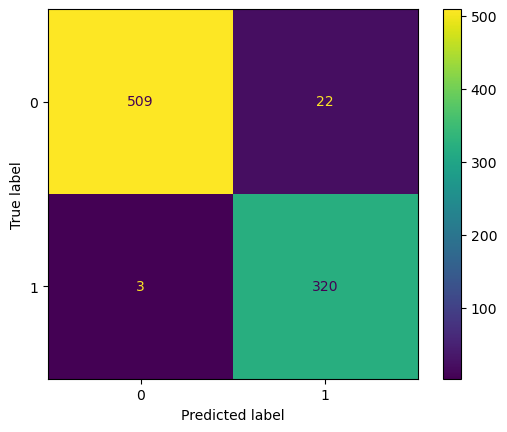

In [112]:
cm=confusion_matrix(y_test,y_pred2)
print('confusion matrix:',cm)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [114]:
joblib.dump(tree_smote, "loan_tree_smote_model.pkl")

['loan_tree_smote_model.pkl']

<font size='4'>SMOTE was applied to address class imbalance by synthetically generating minority class samples,leading to improved recall and F1-score.
</font>

<font size='5'>Insights :</font>
<font size='4'>Two classification models were trained: Logistic Regression and Decision Tree.
The Decision Tree model outperformed Logistic Regression in terms of precision, recall, and F1-score, particularly in correctly identifying approved loan applications.
This indicates that the Decision Tree was better able to capture non-linear relationships within the dataset.</font>